# Descriptive measures: part 2, measures of variation and the five number summary

We will finish this first part of the module by looking at how to summarize data numerically by considering ways in which we can describe the variation of a data set, and how to identify outliers. You will then be ready to try the first TD.

## 2: Measures of variation

### 2a: The range

The range is simply the difference between the maximum and minimum values of a data set:

In [2]:
# load the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

# generate some random integers and print them out
x = np.random.normal(loc=20,scale=5,size=25)
with np.printoptions(precision=3, suppress=True): # this line tells python only to print 3 decimal places
    print('x={}'.format(x))

x=[20.593 20.177  7.88  22.968 18.982 25.556 12.782 22.581 21.231 23.086
 16.883 13.095 14.063 13.897 30.205 17.102 15.885 19.362 18.237 19.442
 20.801 24.924 19.777 19.078 22.633]


In [3]:
# the range is the maximum value minus the minimum value
print('The maximum value of x is: {:3.5}'.format(np.max(x)))
print('The minimum value of x is: {:3.5}'.format(np.min(x)))
print('The range of x is: {:3.5} - {:3.5} = {:3.5}'.format(np.max(x), np.min(x), np.max(x)-np.min(x)))

The maximum value of x is: 30.205
The minimum value of x is: 7.88
The range of x is: 30.205 - 7.88 = 22.326


Although the range is easy to calculate, it only takes into account the largest and smallest values, and so may not tell us much about the distribution of the data.

### 2b: The standard deviation

The standard deviation takes into account all available observations to summarize the data distribution. It indicates how far any given observation lies from the mean on average. 

If we choose to use the mean as the measure of centre, then the associated measure of variation will be the standard deviation.

The formula to calculate the standard deviation of a given set of data is:
$$s = \sqrt{\frac{\sum_i (x_i-\bar{x})^2}{n-1}}$$
where $\sum_i$ indicates the sum over all possible observations, $x_i$ is a given data point, $\bar{x}$ is the mean, and $n$ is the number of points in the data set.

Technically, this is known as the _sample_ standard deviation. There exists another formula, for the _population_ standard deviation, but there are very few situations in which you would need to use this in practice. To calculate it, in the formula above, you simply replace $n-1$ by $n$. We will talk more about this in a later class. In almost all practical situations, the formula that you will want to use is the one above, for the sample standard deviation.

There exists a simple function to calculate the standard deviation in numpy: ```np.std(x, ddof=1)```. The argument ```ddof=1``` tells python to use $n-1$, rather than $n$, in the denominator.

In [4]:
# using the random values of x generated previously
print('The standard deviation of x is: {:5.3}'.format(np.std(x, ddof=1)))

The standard deviation of x is:  4.74


Create a plot below showing a histogram of the data, and add vertical lines showing the mean, mean + 1 standard deviation and mean - 1 standard deviation.

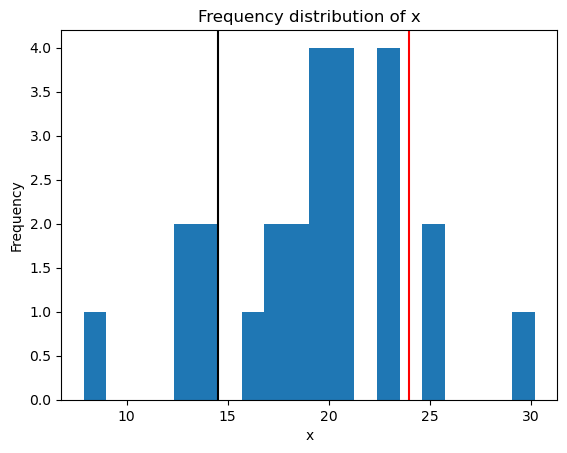

In [5]:
# enter your code here
plt.figure()
hist = plt.hist(x, bins = 20)
plt.axvline(np.mean(x) + np.std(x,ddof=1),color='r')
plt.axvline(np.mean(x) - np.std(x,ddof=1),color='k')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Frequency distribution of x')
plt.show()

What percentage of the values lie in the range ($\bar{x}-s$) < $x$ < ($\bar{x}+s$) ?  
_Hint: you can find the length of an array using the_ ```len(x)``` _function, and you can select values where_ ```x``` _is greater than a and less than b by using boolean selection:_ ```x[(x > a) & (x < b)]```

What percentage of the values lie in the range ($\bar{x}-2s$) < $x$ < ($\bar{x}+2s$) ?  

In [29]:
# enter your code here
# percentage of the values lie in the range (𝑥¯−𝑠) < 𝑥 < (𝑥¯+𝑠) 
mean = np.mean(x)
s = np.std(x,ddof=1)
print(s)
#I have to compare the length betwenn (𝑥¯−𝑠) and (𝑥¯+𝑠) to the total length x
pvr = len(x[(x>mean - s) & (x<mean + s)]) //len(x)
pvr2 = len(x[(x>mean - 2*s) & (x<mean + 2*s)]) //len(x)
print('pvr=',pvr, ' and ','pvr2=',pvr2)

4.741674352082724
pvr= 0  and  pvr2= 0


If ```x``` contains a series of measurements of temperature, in °C, what are the units of its standard deviation?

The unit of the temperature average is the temperature. And looking at the calculus pf std, we can deduce that the unit is °C. 

### 2c: The interquartile range (IQR)

The median of a data set divides the top 50% of values from the bottom 50% of values: it divides the data set in half.

Quartiles divide the data set into 4. A data set thus has three quartiles: 
- The lower quartile (sometimes called the first quartile, or Q1) separates the lowest 25% of the data from the remaining 75%. 
- The second quartile, Q2, is the median, as above.
- The upper quartile (sometimes called the third quartile, or Q3) separates the highest 25% of the data from the remaining 75%.

As an example, if we have a data set containing 16 values, the lower quartile lies between values \#4 and \#5, the median lies between values \#8 and \#9 and the upper quartile between values \#12 and \#13:

In [30]:
# generate 16 random integers
x = np.random.randint(20, size=16)
# sort the data and print out the values
x = np.sort(x)
with np.printoptions(precision=3, suppress=True): # this line tells python only to print 3 decimal places
    print('x={}'.format(x))
    
# calculate the quartiles:
qlen = len(x)//4 # calculate how many values are in each quartile
q1 = np.mean(x[qlen-1:qlen+1]); print('Q1={:2.1f}'.format(q1))
q2 = np.mean(x[(2*qlen)-1:(2*qlen)+1]); print('Q2={:2.1f}, np.median(x)={:2.1f}'.format(q2,np.median(x)))
q3 = np.mean(x[(3*qlen)-1:(3*qlen)+1]); print('Q3={:2.1f}'.format(q3))

x=[ 1  4  4  4  5  5  9 12 13 13 13 13 13 17 19 19]
Q1=4.5
Q2=12.5, np.median(x)=12.5
Q3=13.0


The **interquartile range**, or IQR, is the difference between the upper and lower quartiles (i.e. Q3 - Q1). 50% of the data thus lie between these two values. You can compare this to the values above for the standard deviation where you found the percentage of the values lie in the range ($\bar{x}-s$) < $x$ < ($\bar{x}+s$).

In the same way that the standard deviation is the measure of variation associated with the mean, the interquartile range is the measure of variation associated with the median. The median and interquartile range are **robust measures**: they are not strongly affected by the presence of outliers. In contrast, the mean and the standard deviation are not robust.

There are two possible ways to calculate the IQR in python. Using numpy, we can use the ```percentile```function:

In [31]:
# calculate Q1 and Q3, then subtract to get the IQR
q3, q1 = np.percentile(x, [75,25], interpolation='midpoint')
iqrange = q3 - q1

# print out the results
print('Q1={:2.1f}'.format(q1))
print('Q3={:2.1f}'.format(q3))
print('IQR={:2.1f}'.format(iqrange))

Q1=4.5
Q3=13.0
IQR=8.5


Alternatively, we can use the ```scipy.stats``` function, ```iqr```:

In [32]:
from scipy.stats import iqr
print('IQR={:2.1f}'.format(iqr(x, interpolation="midpoint")))

IQR=8.5


Finally, plot another histogram of ```x```, showing Q1, Q3 and the mean $\pm$ the standard deviation as vertical lines.

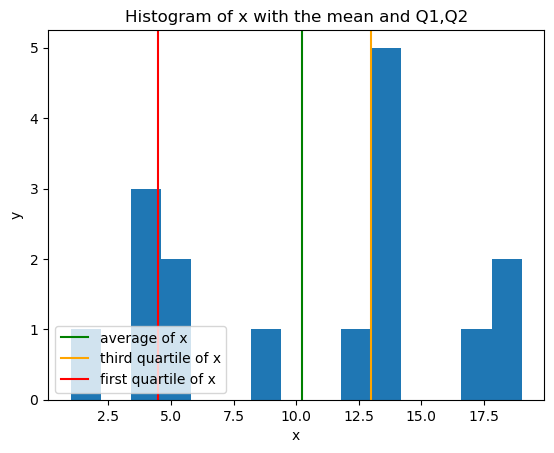

In [34]:
# enter your code here
plt.hist(x,bins=15)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(np.mean(x),color='green',label = 'average of x')
q3, q1 = np.percentile(x, [75,25], interpolation='midpoint')
plt.axvline(q3,color='orange',label = 'third quartile of x')
plt.axvline(q1,color='red',label = 'first quartile of x')                       
plt.legend(loc=3)
plt.title('Histogram of x with the mean and Q1,Q2')
plt.show()

If you have the ipywidgets python library installed on your machine, you can see the effect of outliers on the quartiles, and on the mean $\pm$ standard deviation by running the cell below, and moving the sliders in the figure produced below.  
The slider *npts* controls the number of data points generated, and *pc_anom* controls the percentage of "anomaly" points.

Alternatively, if you don't have the ipywidgets library installed, you can click on the button [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/closes/da1_notebooks/fe0de09959a57f93abc447b6435a70d2fcc03a93?filepath=da1_chapter_1_interactive_figures.ipynb) to run the notebook in the cloud if you want to try this out.

In [35]:
from scipy.stats import iqr
from ipywidgets import interactive
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()


def plotpdf(mean=0.0,stdev=1.0,npts=250,pc_anom=0):
    np.random.seed(42)
    xcore = np.random.normal(loc=mean,scale=stdev,size=npts)
    N,xbins=np.histogram(xcore,bins=30)
    xd = np.mean(np.diff(xbins))
    xbins = np.arange(-4,12,xd)
    if pc_anom > 0:
        xanom = np.random.normal(loc=mean+(6*stdev), scale=2*stdev,
                                 size=np.round(npts*pc_anom//100).astype(int))
        data = np.append(xcore,xanom)
    else:
        data = xcore
    plt.figure(1,figsize=(6,5))
    plt.hist(data,bins=xbins)
    mline=plt.axvline(np.mean(data),color='r',linestyle='--',linewidth=2,label='Mean')
    dline=plt.axvline(np.median(data),color='k',linestyle='--',linewidth=2,label='Median')
    mslow=plt.axvline(np.mean(data)-np.std(data),color='r',linestyle='-',linewidth=2,label='1 s.d.')
    mshi=plt.axvline(np.mean(data)+np.std(data),color='r',linestyle='-',linewidth=2)
    q3=plt.axvline(np.percentile(data,75),color='k',linestyle='-',linewidth=2,label='Q1/3')
    q1=plt.axvline(np.percentile(data,25),color='k',linestyle='-',linewidth=2)
    plt.ylim(0,npts//8)
    plt.xlim(-4,12)
    plt.legend()
    return

iplot = interactive(plotpdf,mean=(-3.0,3.01,1.0),stdev=(0.1,2.1,0.2),npts=(250,5001,250),pc_anom=(0,10.5,1));
output = iplot.children[-1];
output.layout.height = '350px'
iplot

ModuleNotFoundError: No module named 'ipywidgets'

As you can see, the standard deviation changes much more rapidly when we add outliers than does the IQR. This is why we sometimes need to use robust measures.

### 2d: the five number summary and identification of outliers

The five number summary comprises the minimum and maximum data values, and the three quartiles: [min Q1 median Q2 max]
- From the median, we obtain the measure of centre of the data
- From Q1 and Q3, we obtain a measure of the variation of the middle two quarters of the data
- From the minimum value and Q1, we obtain a sense of the variation of the lowest quarter of the data
- From the Q3 and the maximum value, we obtain a sense of the variation of the highest quarter of the data

Potential outliers can be identified using the upper and lower limits of the data set:
- The lower limit is: Q1 - 1.5\*IQR
- The upper limit is: Q3 + 1.5\*IQR  

Values lying outside of these ranges are potential outliers or anomalies.

This information can be visualised using a boxplot:

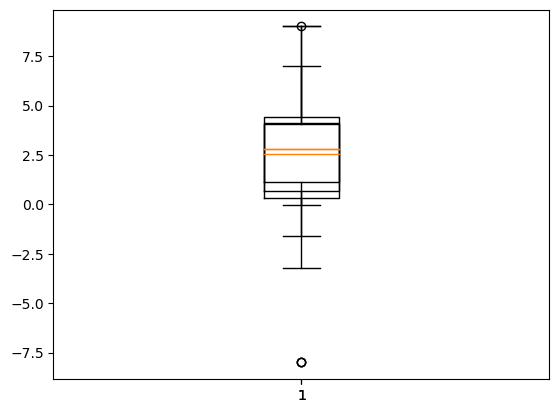

In [38]:
# generate some normally-distributed data
x = np.random.normal(loc=2,scale=2,size=30)
# add in some outliers
x = np.append(x,(-8,7,9))

# make a boxplot
plt.boxplot(x)
plt.show();

In this figure, the y-axis gives the information about the data values: 
- the red line shows the median of the data
- the rectangle in the middle of the figure extends from Q1 to Q3
- the horizontal lines, connected to the main rectangle by two vertical lines, show the positions of the _adjacent values_ : these are the most extreme data points that still lie within the upper and lower limits. These lines are known as _whiskers_
- the circles show points lying outside the upper and lower limits: these are potential outliers

We have drawn the figure in the vertical here, but boxplots can also be drawn horizontally: there is no rule about this.

If we exclude the outliers from the data set, the boxplot will look like this:

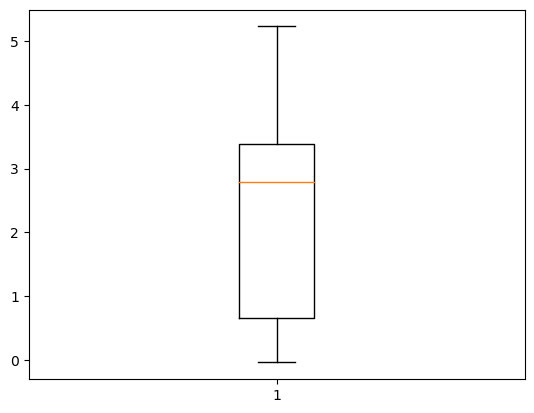

In [39]:
# calculate the upper and lower limits
q3, q1 = np.percentile(x, [75,25], interpolation='midpoint')
iqrange = q3 - q1
lower_limit = q1 - (1.5*iqrange)
upper_limit = q1 + (1.5*iqrange)

# get the indices of the data that lie within these limits
ix = np.where((x > lower_limit) & (x < upper_limit))

# make a boxplot using only these points
plt.boxplot(x[ix])
plt.show();

Has the form of the boxplot (e.g. the whiskers, the size of the rectangle, position of the median) changed compared to the initial plot? Why might this be?

The scale is not the same and we do not plot the same data either.

#### What to do if you think you have outliers

If you have anomalous values in your data set, you need to decide whether to keep them or not.
Outliers may indicate a measurement or recording error, an observation from a different population (for example, if you are trying to quantify the variability of a particular water mass, and the data set includes also measurements of a different water mass), or an unusual, extreme observation.

If you are able to identify a measurement error, or a clear reason why the outlier does not belong in the data set, the outlier can simply be removed (or potentially corrected, if it is due to an instrumental error that can be quantified).

If the outlier represents an observation of an extreme state, we need to consider carefully whether we should keep it or not. There is not always an easy answer to this question: often we need to understand what the outlier represents before we can decide whether or not it belongs in our analysis.